In [1]:
!pip install -U textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/yohanismael/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

In [3]:
data=pd.read_csv('tweets_v8.csv')
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'source', 'is_retweet'],
      dtype='object')

In [103]:
def str_to_timestamp(s):
    out=[]

    s2=str.split(s,'+')
    s3=str.split(s2[0],' ')

    s4=str.split(s3[0],'-')

    s5=str.split(s3[1],':')
    year=int(s4[0])
    month=int(s4[1])
    day=int(s4[2])
    hour=int(s5[0])
    minute=int(s5[1])
    second=int(s5[2])

    return(datetime(year=year,month=month,day=day,hour=hour,minute=minute,second=second).timestamp())

In [112]:
clean_data=data[['user_followers', 'user_friends', 'user_favourites', 'user_verified','date', 'text']]
L_polarity=[]
timestamps=[]
for i in range(clean_data.shape[0]):
    blob=TextBlob(clean_data['text'][i])
    L_polarity.append(blob.sentiment.polarity)
    timestamps.append(str_to_timestamp(clean_data['date'][i]))

array_polarity=np.asarray(L_polarity)
clean_data.insert(clean_data.columns.shape[0], "sentiment_polarity", array_polarity, True)

array_timestamps=np.asarray(timestamps)
array_timestamps=array_timestamps-array_timestamps.min()
clean_data.insert(clean_data.columns.shape[0], "timestamps", array_timestamps, True)

In [114]:
clean_data.columns

Index(['user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'sentiment_polarity', 'timestamps'],
      dtype='object')

(array([  437.,   702.,  2135.,  7387.,  6605., 34683., 11798.,  6243.,
         5566.,  2730.,  1733.]),
 array([-1.        , -0.81818182, -0.63636364, -0.45454545, -0.27272727,
        -0.09090909,  0.09090909,  0.27272727,  0.45454545,  0.63636364,
         0.81818182,  1.        ]),
 <BarContainer object of 11 artists>)

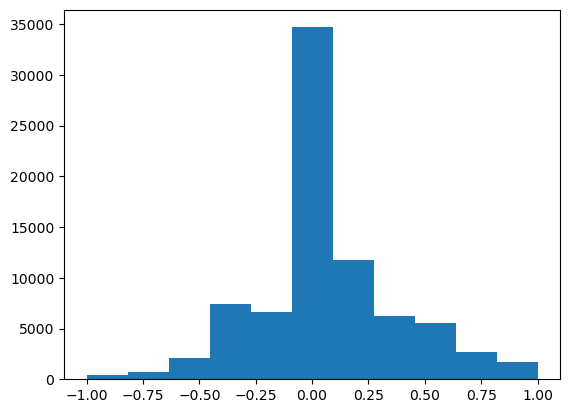

In [115]:
plt.hist(clean_data['sentiment_polarity'],bins=11)

In [123]:
clean_data['timestamps'].argmin()
clean_data

,user_followers,user_friends,user_favourites,user_verified,date,text,sentiment_polarity,timestamps
0,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,-0.200,90014.0
1,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,0.000,89998.0
2,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,0.000,89998.0
3,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,-0.200,89980.0
4,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",-0.225,89976.0
...,...,...,...,...,...,...,...,...
80014,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,0.000,1996862.0
80015,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,-0.400,1996814.0
80016,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,-0.250,1996776.0
80017,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,0.000,1996773.0


(array([142., 135., 202., ...,  80.,  90.,  74.]),
 array([0.00000000e+00, 2.31325574e+03, 4.62651149e+03, ...,
        2.31094249e+06, 2.31325574e+06, 2.31556900e+06]),
 <BarContainer object of 1001 artists>)

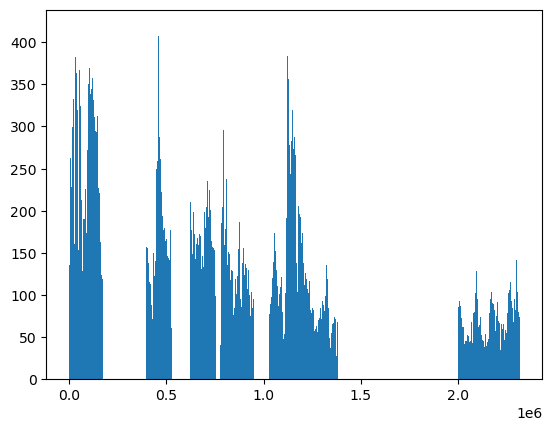

In [125]:
plt.hist(clean_data['timestamps'],bins=1001)